In [27]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
## all my csv (the namefile starting with a number)
files = [i for i in os.listdir('listings/') if i[0].isdigit()]


## Initializing all csv files as a pandas dataframe
def setup(datalist):
    
    dfs = []
    for i in datalist:  
        try:
            dfs.append(pd.read_csv("listings/" + str(i)))
        except UnicodeDecodeError:
            print(i)
    
    return dfs     

dfs = setup(files)


## Creating a list of pandas datetimes from the filenames 
def timestamps(datalist):
    periods = []
    for i in datalist:
        y = i.split(".")[0].split("_")[1]
        m = i.split(".")[0].split("_")[0]
        d = 1
        date = str(y) + "-" + str(m) + "-" + str(d)
        date = pd.Timestamp(date)
        periods.append(date)
    return periods

periods = timestamps(files)


## Sorting dataframes by date
tmp = [(d,p) for d,p in sorted(zip(dfs,periods), key=lambda pair: pair[1])]

## I select csvs with the column "zone"
tmp = [(a,b) for a,b in tmp if "zone" in a]

periods = [b for a,b in tmp]
dfs = [a for a,b in tmp]
    
    
## then check out if everything went well 
assert(len(periods) == len(dfs))

In [29]:
## remove price outliers as usual

def remove_outliers(period):
    x = period['price'] * period['availability_365'] / 365
    period["price_pond"] = x
    y = period['price']
    return period[y.between(y.quantile(.0001), y.quantile(.97))]

dfs = [remove_outliers(i) for i in dfs]


## for a better readability

periods = [i.strftime('%Y/%m') for i in periods]

In [30]:
periods

['2018/07',
 '2018/08',
 '2019/01',
 '2019/02',
 '2019/04',
 '2019/05',
 '2019/07',
 '2019/08',
 '2019/09',
 '2019/10',
 '2019/11',
 '2019/12',
 '2020/01',
 '2020/02',
 '2020/04',
 '2020/05',
 '2020/06',
 '2020/08',
 '2020/09',
 '2020/10',
 '2020/11',
 '2020/12',
 '2021/01',
 '2021/02',
 '2021/03',
 '2021/04',
 '2021/06',
 '2021/07']

In [31]:
## make a column with macroarea value {"periferia", "centro"} 

def aggregate_zone(df):
    df["macroarea"] = 'periferia'
    df.loc[df['zone'].isin(['Marconi','Irnerio','Malpighi','Galvani']), 'macroarea'] = 'centro'
    return df

dfs = [aggregate_zone(i) for i in dfs]

/home/laszlo/my_venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/laszlo/my_venv/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
def prezzo_medio_per_zona(x1, x2, dfs=dfs):    
    
    y1 = dfs[x1].groupby("zone")['price'].mean()
    y2 = dfs[x2].groupby("zone")['price'].mean()

    s1 = ((y2 - y1) / y1 ) * 100
    s0 = s1.index

    for ix,it in enumerate(s0):
        print(f"tasso crescita prezzo medio fra {periods[x1]} e {periods[x2]} per quartiere {it} è del {s1[ix]:.2f} %")

    print()
    print(f"media {((y2.sum()- y1.sum()) / y1.sum() ) * 100}")


for i in range(10,14):
    prezzo_medio_per_zona(i, i+2)
    print()
    print()

tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Barca è del -7.36 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Bolognina è del 2.44 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Borgo Panigale è del 7.24 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Colli è del -5.04 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Corticella è del 0.05 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Costa Saragozza è del -3.22 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Galvani è del 3.13 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Irnerio è del -2.15 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Lame è del 5.18 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Malpighi è del -0.10 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere Marconi è del -0.84 %
tasso crescita prezzo medio fra 2019/11 e 202

In [33]:
def prezzo_medio_per_zona(x1, dfs=dfs):    
    
    y1 = dfs[x1].groupby("zone")['price'].mean()
    print(f"media prezzo nel periodo {periods[x1]} {y1}")


for i in range(14):
    prezzo_medio_per_zona(i)
    print()
    print()

media prezzo nel periodo 2018/07 zone
Barca              56.500000
Bolognina          58.336134
Borgo Panigale     48.823529
Colli              83.930233
Corticella         46.027027
Costa Saragozza    57.891720
Galvani            73.554286
Irnerio            71.510000
Lame               58.290323
Malpighi           70.473354
Marconi            74.200000
Mazzini            60.960000
Murri              57.566434
S. Ruffillo        57.156250
S. Viola           46.526316
S. Vitale          54.845588
Saffi              56.757143
San Donato         59.948187
Name: price, dtype: float64


media prezzo nel periodo 2018/08 zone
Barca              57.482759
Bolognina          58.609418
Borgo Panigale     48.246575
Colli              84.247059
Corticella         45.404762
Costa Saragozza    59.059211
Galvani            75.164804
Irnerio            72.735197
Lame               56.176471
Malpighi           70.439103
Marconi            74.568376
Mazzini            59.679487
Murri              57.48

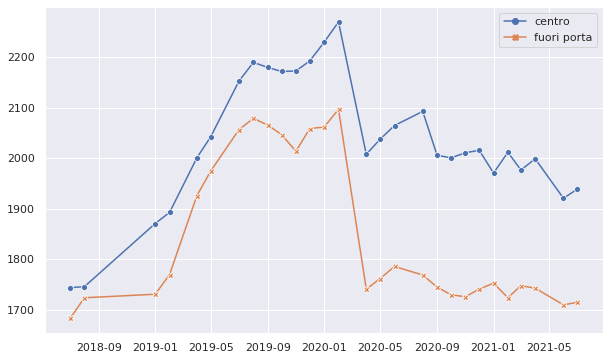

In [34]:
def snsplot(lines):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,6))
    sns.lineplot(markers=True, dashes=False, data=lines)


def ids_during_time(dfs, periods):
    index = pd.DatetimeIndex(periods)

    centro = pd.Series([dfs[i][dfs[i].macroarea.isin(["centro"])]\
                                    .id.count() for i in range(len(dfs))], index=index)
    #bolognina = pd.Series([dfs[i][dfs[i].macroarea.isin(["bolognina"])]\
    #                                .id.count() for i in range(len(dfs))], index=index)
    periferia = pd.Series([dfs[i][dfs[i].macroarea.isin(["periferia"])]\
                                    .id.count() for i in range(len(dfs))], index=index)
    

    lines = centro.rename("centro").to_frame()\
        .join(periferia.rename("fuori porta").to_frame())
            #.join(bolognina.rename("bolognina").to_frame())\
    snsplot(lines)
    
ids_during_time(dfs, periods)


#andamento annunci

In [41]:
def prezzo_medio_per_macroarea(x1, x2, dfs=dfs):
    
    y1 =dfs[x1].groupby("macroarea")['price'].mean()
    y2 = dfs[x2].groupby("macroarea")['price'].mean()

    s1 = ((y2 - y1) / y1 ) * 100
    s0 = s1.index

    for ix,it in enumerate(s0):
        print(f"tasso crescita prezzo medio fra {periods[x1]} e {periods[x2]} per quartiere {it} è del {s1[ix]:.2f} %")
        
        
for i in range(10,26):
    prezzo_medio_per_macroarea(i, i+2)
    print()
    print()

tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere centro è del -0.38 %
tasso crescita prezzo medio fra 2019/11 e 2020/01 per quartiere periferia è del 0.97 %


tasso crescita prezzo medio fra 2019/12 e 2020/02 per quartiere centro è del 2.14 %
tasso crescita prezzo medio fra 2019/12 e 2020/02 per quartiere periferia è del 2.42 %


tasso crescita prezzo medio fra 2020/01 e 2020/04 per quartiere centro è del 12.40 %
tasso crescita prezzo medio fra 2020/01 e 2020/04 per quartiere periferia è del 9.94 %


tasso crescita prezzo medio fra 2020/02 e 2020/05 per quartiere centro è del 5.86 %
tasso crescita prezzo medio fra 2020/02 e 2020/05 per quartiere periferia è del 7.45 %


tasso crescita prezzo medio fra 2020/04 e 2020/06 per quartiere centro è del -4.26 %
tasso crescita prezzo medio fra 2020/04 e 2020/06 per quartiere periferia è del -2.26 %


tasso crescita prezzo medio fra 2020/05 e 2020/08 per quartiere centro è del -3.69 %
tasso crescita prezzo medio fra 2020/05 e 2020

In [42]:
def tasso_crescita_per_zona(x1, x2, dfs=dfs):   
    
    y1 =  dfs[x1]['zone'].value_counts(normalize=False)
    y2 = dfs[x2]['zone'].value_counts(normalize=False)

    s1 = ((y2 - y1) / y1 ) * 100
    s0 = s1.index

    for ix,it in enumerate(s0):
        print(f"tasso crescita num. annunci fra {periods[x1]} e {periods[x2]} per quartiere {it} è del {s1[ix]:.2f} %")
    
    print()
    print(f"media {((y2.sum() - y1.sum()) / y1.sum() ) * 100}")
    
for i in range(10,26):
    tasso_crescita_per_zona(i, i+2)
    print()
    print()

tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere Irnerio è del 4.78 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere Marconi è del -0.49 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere Galvani è del 3.32 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere Bolognina è del 1.66 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere Malpighi è del 2.80 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere S. Vitale è del 4.08 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere San Donato è del 1.19 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere Saffi è del 0.52 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere Costa Saragozza è del -3.83 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere Murri è del 7.95 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere Mazzini è del -1.98 %
tasso crescita num. annunci fra 2019/11 e 2020/01 

In [43]:
def tasso_crescita_per_macroarea(x1, x2, dfs=dfs):   
    
    y1 = dfs[x1]['macroarea'].value_counts(normalize=False)
    y2 = dfs[x2]['macroarea'].value_counts(normalize=False)

    s1 = ((y2 - y1) / y1 ) * 100
    s0 = s1.index

    for ix,it in enumerate(s0):
        print(f"tasso crescita num. annunci fra {periods[x1]} e {periods[x2]} per quartiere {it} è del {s1[ix]:.2f} %")
    
    print()
    print(f"media {((y2.sum() - y1.sum()) / y1.sum() ) * 100}")
    
for i in range(10,26):
    tasso_crescita_per_macroarea(i, i+2)
    print()
    print()

tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere centro è del 2.62 %
tasso crescita num. annunci fra 2019/11 e 2020/01 per quartiere periferia è del 2.38 %

media 2.5077621208502507


tasso crescita num. annunci fra 2019/12 e 2020/02 per quartiere centro è del 3.51 %
tasso crescita num. annunci fra 2019/12 e 2020/02 per quartiere periferia è del 1.85 %

media 2.7046095954844778


tasso crescita num. annunci fra 2020/01 e 2020/04 per quartiere centro è del -9.96 %
tasso crescita num. annunci fra 2020/01 e 2020/04 per quartiere periferia è del -15.57 %

media -12.65144454799627


tasso crescita num. annunci fra 2020/02 e 2020/05 per quartiere centro è del -10.22 %
tasso crescita num. annunci fra 2020/02 e 2020/05 per quartiere periferia è del -15.98 %

media -12.983741699106938


tasso crescita num. annunci fra 2020/04 e 2020/06 per quartiere centro è del 2.84 %
tasso crescita num. annunci fra 2020/04 e 2020/06 per quartiere periferia è del 2.58 %

media 2.7207255268071484

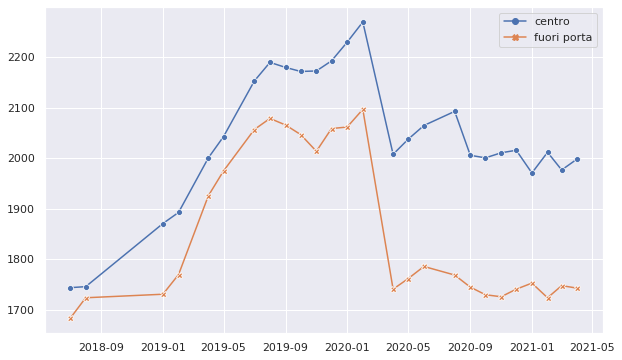

In [25]:
def snsplot(lines):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,6))
    sns.lineplot(markers=True, dashes=False, data=lines)


def ids_during_time(dfs, periods):
    index = pd.DatetimeIndex(periods)

    centro = pd.Series([dfs[i][dfs[i].macroarea.isin(["centro"])]\
                                    .id.count() for i in range(len(dfs))], index=index)
    #bolognina = pd.Series([dfs[i][dfs[i].macroarea.isin(["bolognina"])]\
    #                                .id.count() for i in range(len(dfs))], index=index)
    periferia = pd.Series([dfs[i][dfs[i].macroarea.isin(["periferia"])]\
                                    .id.count() for i in range(len(dfs))], index=index)
    

    lines = centro.rename("centro").to_frame()\
        .join(periferia.rename("fuori porta").to_frame())
            #.join(bolognina.rename("bolognina").to_frame())\
    snsplot(lines)
    
ids_during_time(dfs, periods)


#andamento annunci

In [26]:
# introiti totali, percentuali su Centro, Bolognina.

per = dfs[-1]
introiti_tot = per['price_pond'].sum()
introiti_centro = per[per.macroarea == 'centro']['price_pond'].sum()
introiti_bolognina = per[per.zone == 'Bolognina']['price_pond'].sum()

print(f"introiti totali su Bolo {introiti_tot} €")
print()

print(f"Introiti Bolognina su totale: {(introiti_bolognina/introiti_tot)*100:.2f} %")
print(f"Introiti Centro su totale: {(introiti_centro/introiti_tot)*100:.2f} %")

introiti totali su Bolo 126792.07397260275 €

Introiti Bolognina su totale: 8.45 %
Introiti Centro su totale: 55.76 %
